# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

https://openweathermap.org/current

instructions on how to make an API call

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
#<------ Showing the random cities selected:
N=15
print(cities[slice(N)])

['georgetown', 'mirto', 'adamstown', 'avarua', 'edinburgh of the seven seas', 'utrik', 'katsuura', 'spring creek', 'sinabang', 'huarmey', 'kenai', 'badger', 'terra santa', 'nova sintra', 'chibougamau']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#<------ https://api.openweathermap.org/data/2.5/weather?
        #lat={lat}&lon={lon}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?"
#<------mode="Response format. Possible values are xml and html. Automatic .json"
unit="imperial"
#<------lang="You can use this parameter to get the output in your language."
        #spanish=sp, es --- frenche=fr

query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

response = requests.get(query_url).json()


In [7]:
#<------Built-in API request by city name
#<------https://api.openweathermap.org/data/2.5/weather?
        #q={city name},{state code},{country code}
        #&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={unit}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_min"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                       "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | mirto
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | spring creek
Processing Record 9 of Set 1 | sinabang
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | kenai
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | terra santa
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | arak
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | sao vicente
Processing Record 21 of Set 1 | igdir
Processing Record 22 of Set 1 | qaqortoq
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,5.4112,82.33,77.95,20,5.01,MY,1690153429
1,mirto,38.0847,38.0847,84.31,83.26,1,7.52,IT,1690153460
2,adamstown,-25.0660,-25.0660,68.77,68.77,22,17.11,PN,1690153461
3,avarua,-21.2078,-21.2078,80.65,80.65,75,12.66,CK,1690153461
4,edinburgh of the seven seas,-37.0676,-37.0676,56.19,56.19,58,24.23,SH,1690153282


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,5.4112,82.33,77.95,20,5.01,MY,1690153429
1,mirto,38.0847,38.0847,84.31,83.26,1,7.52,IT,1690153460
2,adamstown,-25.0660,-25.0660,68.77,68.77,22,17.11,PN,1690153461
3,avarua,-21.2078,-21.2078,80.65,80.65,75,12.66,CK,1690153461
4,edinburgh of the seven seas,-37.0676,-37.0676,56.19,56.19,58,24.23,SH,1690153282


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

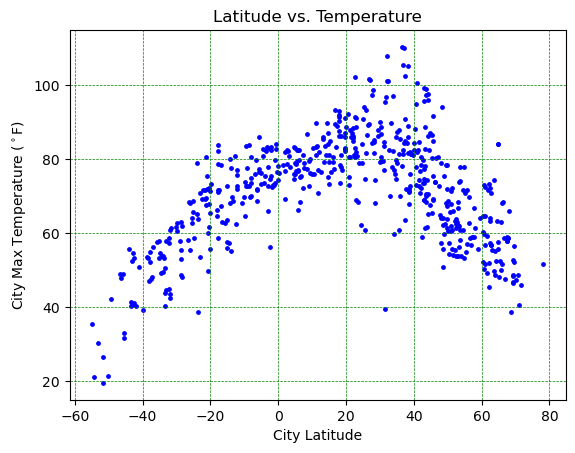

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
            s=6,color="b", marker="o")


# Incorporate the other graph properties

plt.xlabel('City Latitude',fontsize =10)
plt.ylabel('City Max Temperature ($^\circ$F)',fontsize =10)
plt.title('Latitude vs. Temperature')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

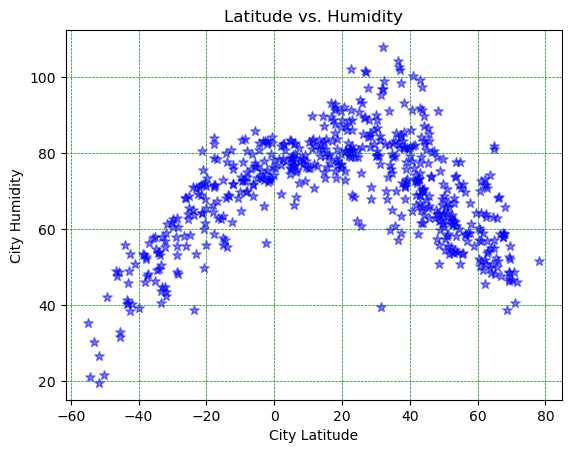

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            s=50,color="b", marker="*",edgecolors='b',alpha=.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude',fontsize =10)
plt.ylabel('City Humidity',fontsize =10)
plt.title('Latitude vs. Humidity')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

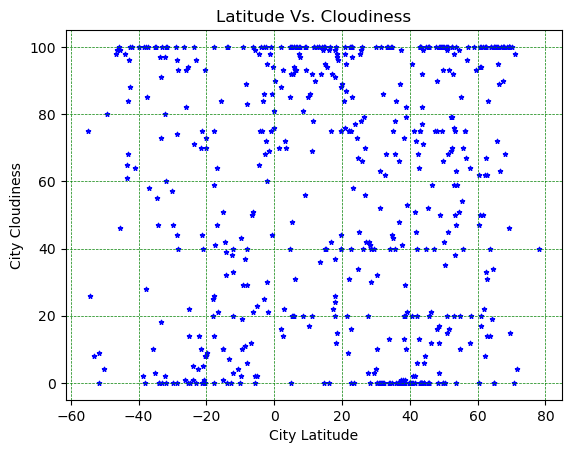

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
                s=10,color="purple", marker="*",edgecolors='b',alpha=1)

# Incorporate the other graph properties
plt.xlabel("City Latitude",fontsize=10)
plt.ylabel("City Cloudiness",fontsize=10)
plt.title("Latitude Vs. Cloudiness")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

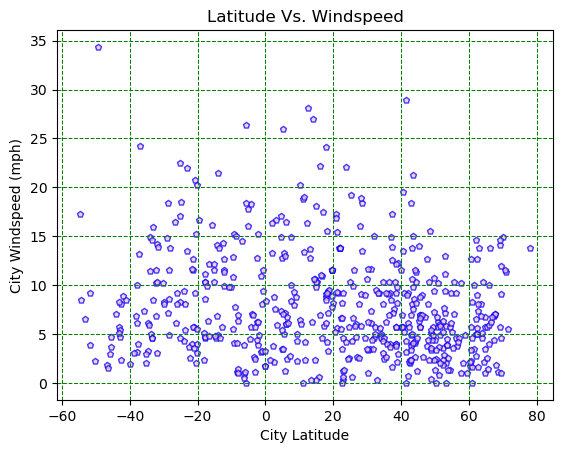

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
            s=20,color="pink", marker="p",edgecolors='b',alpha=.75)

# Incorporate the other graph properties
plt.xlabel("City Latitude",fontsize=10)
plt.ylabel("City Windspeed (mph)",fontsize=10)
plt.title("Latitude Vs. Windspeed")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_regress(x,y, eqn_coordinates):
    r=st.pearsonr(x,y)
    print(f"The r-value is:{round(r[0],4)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,5.4112,82.33,77.95,20,5.01,MY,1690153429
1,mirto,38.0847,38.0847,84.31,83.26,1,7.52,IT,1690153460
5,utrik,11.2278,11.2278,83.17,83.17,69,18.81,MH,1690153462
6,katsuura,35.1333,35.1333,79.03,79.03,43,2.48,JP,1690153462
7,spring creek,40.7266,40.7266,94.82,91.29,95,13.47,US,1690153463


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-25.0660,68.77,68.77,22,17.11,PN,1690153461
3,avarua,-21.2078,-21.2078,80.65,80.65,75,12.66,CK,1690153461
4,edinburgh of the seven seas,-37.0676,-37.0676,56.19,56.19,58,24.23,SH,1690153282
9,huarmey,-10.0681,-10.0681,69.82,69.82,0,9.80,PE,1690153464
12,terra santa,-2.1042,-2.1042,83.16,83.16,30,3.87,BR,1690153465


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.599


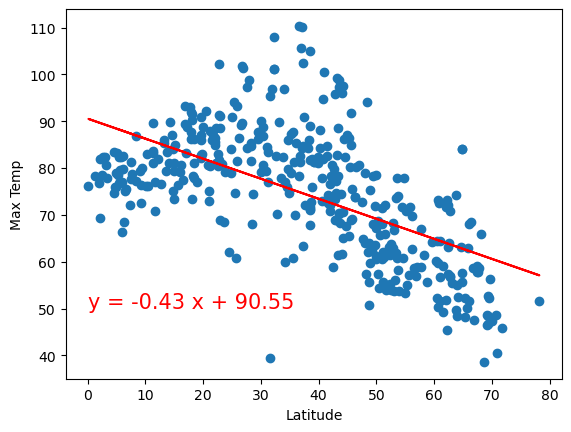

In [46]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"],(0,50))

The r-value is:0.8518


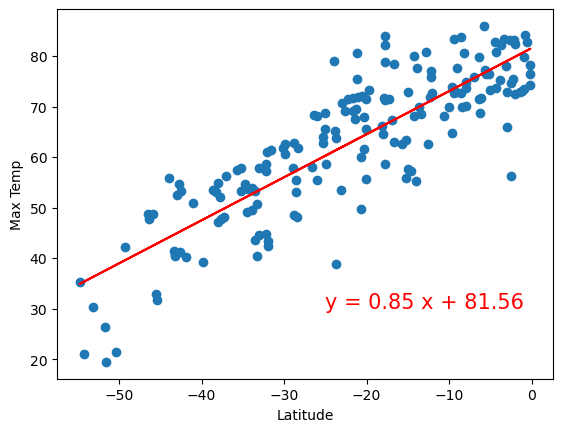

In [45]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"],(-25,30))

**Discussion about the linear relationship:** 

**Northern Hemisphere:**

In the Northern Hemisphere, the statement indicates that there is a relatively strong negative correlation between temperature and latitude with a correlation coefficient of -0.599. A negative correlation means that as you move closer to the North Pole (increasing latitude), the temperature tends to decrease. This is a common observation, as regions closer to the poles generally experience colder temperatures.


**Southern Hemisphere:**

The statement suggests that there is a fairly strong positive correlation between temperature and latitude in the Southern Hemisphere. The correlation coefficient is given as 0.8518. A positive correlation indicates that as you move closer to the equator (increasing latitude from the south pole), the temperature tends to increase. This also aligns with the general understanding that areas closer to the equator experience warmer temperatures.


These statements highlight the general temperature patterns as you move towards different latitudes in both hemispheres. The negative correlation in the Northern Hemisphere and positive correlation in the Southern Hemisphere are well-established climatic trends.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.6252


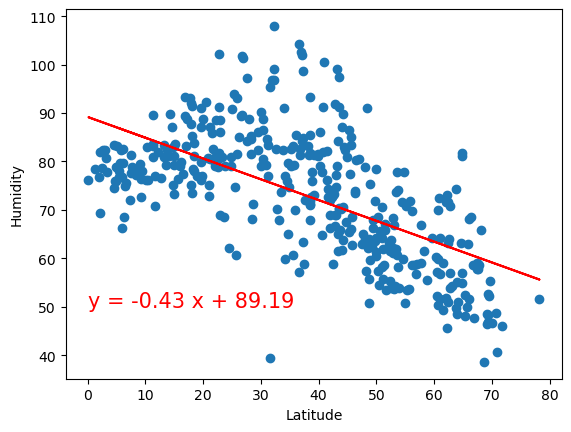

In [43]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(0,50))

The r-value is:0.8598


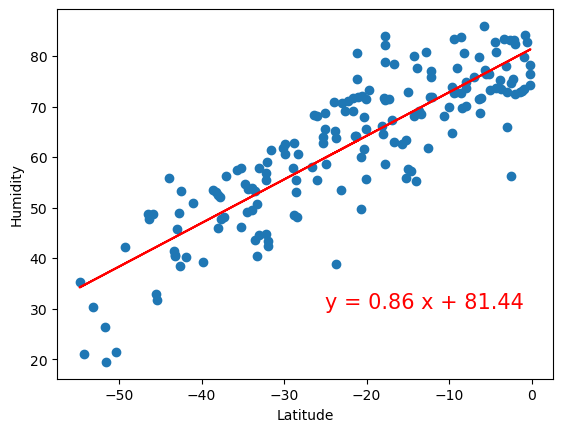

In [42]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-25,30))

**Discussion about the linear relationship:** 

The relationship between humidity and latitude exhibits distinct patterns in both hemispheres. In the Northern Hemisphere, there is a relatively strong positive correlation between humidity and latitude, with a correlation coefficient of -0.6252. This suggests that as one moves further north from the equator, humidity tends to increase. 

On the other hand, in the Southern Hemisphere, there is also a relatively strong positive correlation between humidity and latitude, but with a correlation coefficient of 0.8598. This indicates that as one moves closer to the South Pole, humidity tends to increase. These findings underscore the different moisture trends associated with varying latitudinal positions in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.0517


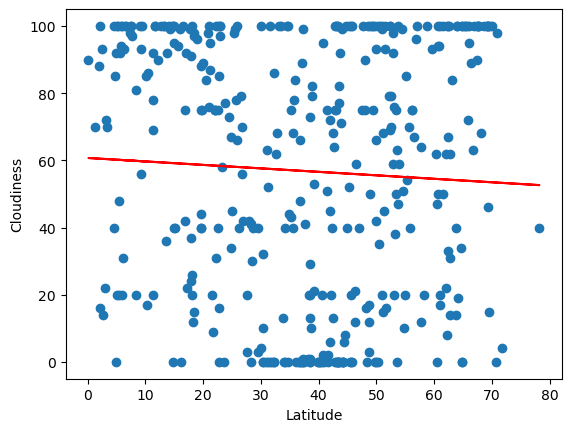

In [55]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Cloudiness"],(100,100))

The r-value is:-0.0642


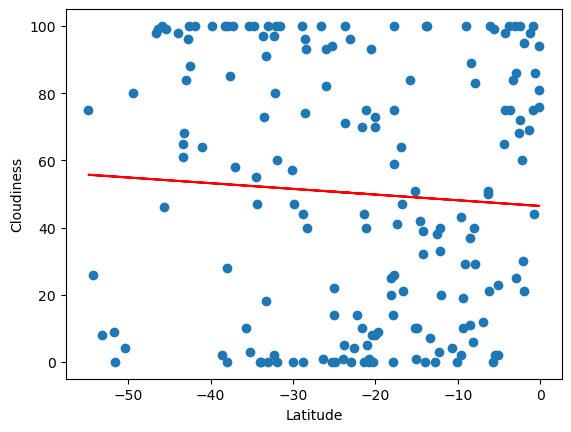

In [56]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Cloudiness"],(50,50))

**Discussion about the linear relationship:**

The association between cloudiness and latitude demonstrates different strengths in the Northern and Southern Hemispheres. In the Northern Hemisphere, there exists a weak negative correlation with a coefficient of -0.0517. This suggests that cloudiness tends to slightly decrease as one moves north from the equator. The data reflects an immaterial change which can be concluded that there is no strong relationship between latitude and cloudiness in the north.

The same can be said about the Southern Hemisphere, there is a relatively weak negative correlation with a coefficient of -0.0642. This indicates that cloudiness is more likely to increase as one moves closer to the South Pole. These contrasting results highlight the varying cloud patterns relative to latitude in each hemisphere.The data reflects an immaterial change which can be concluded that there is no strong relationship between latitude and cloudiness in the south.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.2286


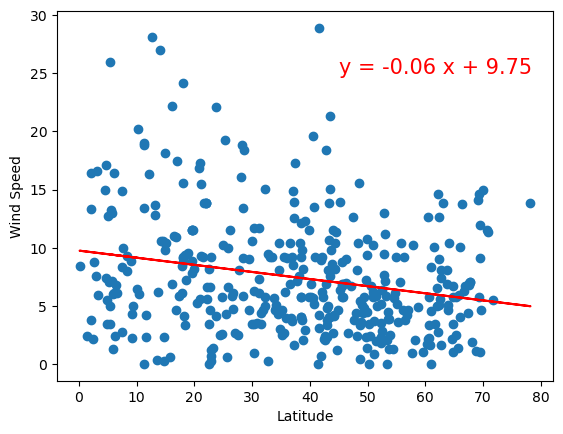

In [59]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(45,25))

The r-value is:-0.025


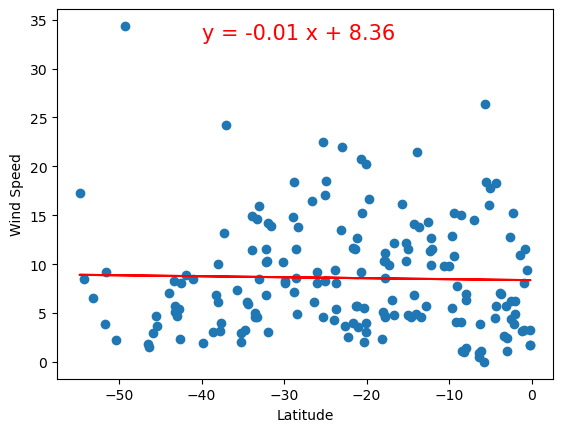

In [61]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Wind Speed"],(-40,33))

**Discussion about the linear relationship:** 

The association between wind speeds and latitude demonstrates different strengths in the Northern and Southern Hemispheres. In the Northern Hemisphere, there exists a semi-weak negative correlation with a coefficient of -0.2286. This suggests that wind speeds tends to slightly decrease as one moves north from the equator. 

The Southern Hemisphere, there is a weak negative correlation with a coefficient of -0.0642. This indicates that wind speeds is more likely to increase as one moves closer to the South Pole. These contrasting results highlight the varying wind speed patterns relative to latitude in each hemisphere.The data reflects an immaterial change which can be concluded that there is no strong relationship between latitude and cloudiness in the south.
